# **Análise dos dados da App Store**

 ### **Obtenção dos Dados**

Os dados usados nessa análise são referentes ao ano de 2017 e foram obtidos a partir do site [Kaggle.com](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)

In [1]:
# Importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

So Funciona no colab

In [2]:
# Lendo o arquivo:
df_app = pd.read_csv('Data/AppleStore.csv')

 ### **Análise dos Dados**

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

Vamos dar uma olhada nas primeiras linhas do Dataframe.

In [3]:
# Primeiras 5 linhas:
df_app.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


### **Quantos linhas e quantas colunas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# Tamanho do Dataframe:
print(f'Número de linhas: {len(df_app.index)}')
print(f'Número de colunas: {len(df_app.columns)}/n')

# Identificando o tipo de cada variável:
display(df_app.dtypes)

Número de linhas: 7197
Número de colunas: 17/n


Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

# **Limpeza e transformação dos dados**

Precisamos garantir que os dados que estamos analisando sejam precisos, caso contrário, os resultados de nossa análise estarão errados.

Vou iniciar a análise verificando se há registos duplicados no Dataframe, pois não nos interessa analisar o mesmo aplicativo mais de uma vez.

In [5]:
# Verificando valores duplicados:
if any(df_app.track_name.duplicated()) is True:
   print(f'Existe valores duplicados na coluna "App"? {True}')
else:
   print(f'Existe valores duplicados na coluna "App"? {False}')

Existe valores duplicados na coluna "App"? True


Bom, infelizmente temos registros duplicados, portanto, precisamos remover essas entradas duplicadas e manter apenas uma entrada por aplicativo. Uma coisa que poderíamos fazer é remover as linhas duplicadas aleatoriamente, mas vamos encontrar uma maneira melhor.

Quanto maior o número de "rating_count_tot", mais recentes devem ser os dados. Em vez de remover duplicatas aleatoriamente, manteremos apenas a linha com o maior número de avaliações e removeremos as outras entradas.

Não sabemos a ordem dos registros e se não ordenarmos podemos correr o risco de eliminar um aplicativo que tem uma avaliação alta.

Agora vou remover os valores duplicados mantendo os registros que tem a avaliação mais alta.

In [6]:
# Removendo os aplicativos duplicados:
df_app = df_app.sort_values(by='rating_count_tot', ascending=False).drop_duplicates('track_name', keep='first')

# Reorganizando os indices:
df_app = df_app.reset_index(drop=True)

In [7]:
df_app.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,17,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,591,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,1561,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,810,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,8,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [8]:
# Dropando as colunas irrelevantes:
def remove_features(lista_features):
    ''' Função que remove as colunas irrelevantes '''
    for i in lista_features:
        df_app.drop(i,axis=1,inplace=True)
remove_features(['id','currency','ver','sup_devices.num','ipadSc_urls.num','vpp_lic'])

### **Qual a porcentagem de valores ausentes no dataset?**

Vamos analisar se a quantidade de valores nulos são siginificativos comparados ao total de entradas.


In [9]:
# Visualizando os valores faltantes:
def missing_value(dataset):
  ''' Função que mostra a porcentagem e o total de valores faltantes de cada coluna, ordenando do maior para o menor '''
  total = dataset.isnull().sum().sort_values(ascending=False)
  percent = dataset.isnull().sum()/dataset.isnull().count().sort_values(ascending=False)
  missing_data = pd.concat([total, percent], axis=1, sort=False, keys=['total', 'percent'])
  missing_data[missing_data['percent']!=0]
  return missing_data

In [10]:
missing_value(df_app)

,total,percent
Unnamed: 0,0,0.0
track_name,0,0.0
size_bytes,0,0.0
price,0,0.0
rating_count_tot,0,0.0
rating_count_ver,0,0.0
user_rating,0,0.0
user_rating_ver,0,0.0
cont_rating,0,0.0
prime_genre,0,0.0


Pelo o que podemos observar essa coluna descreve bem o que as pessoas acham importante em um aplicativo, por isso vamos fazer uma análise mais detalhda nessa coluna.

In [11]:
# Valores únicos da coluna:
df_app.user_rating.unique()

array([3.5, 4.5, 4. , 3. , 5. , 2.5, 2. , 1.5, 1. , 0. ])

Temos valores de classificação igual a zero é para o nosso estudo esses valores não são interessante, visto que esse app se quer foi classificado e não ajudará a traçar o gosto do usuário.

Então o próximo passo será selecionar somente os aplicativos que tiveram uma classificação diferente de zero.

In [12]:
# Selecionando os valores:
df_app = df_app.loc[(df_app.user_rating != 0)]

# **Análise Exploratória dos Dados (EDA)**

### **Quais são as categorias que tem o maior número de aplicativos?**

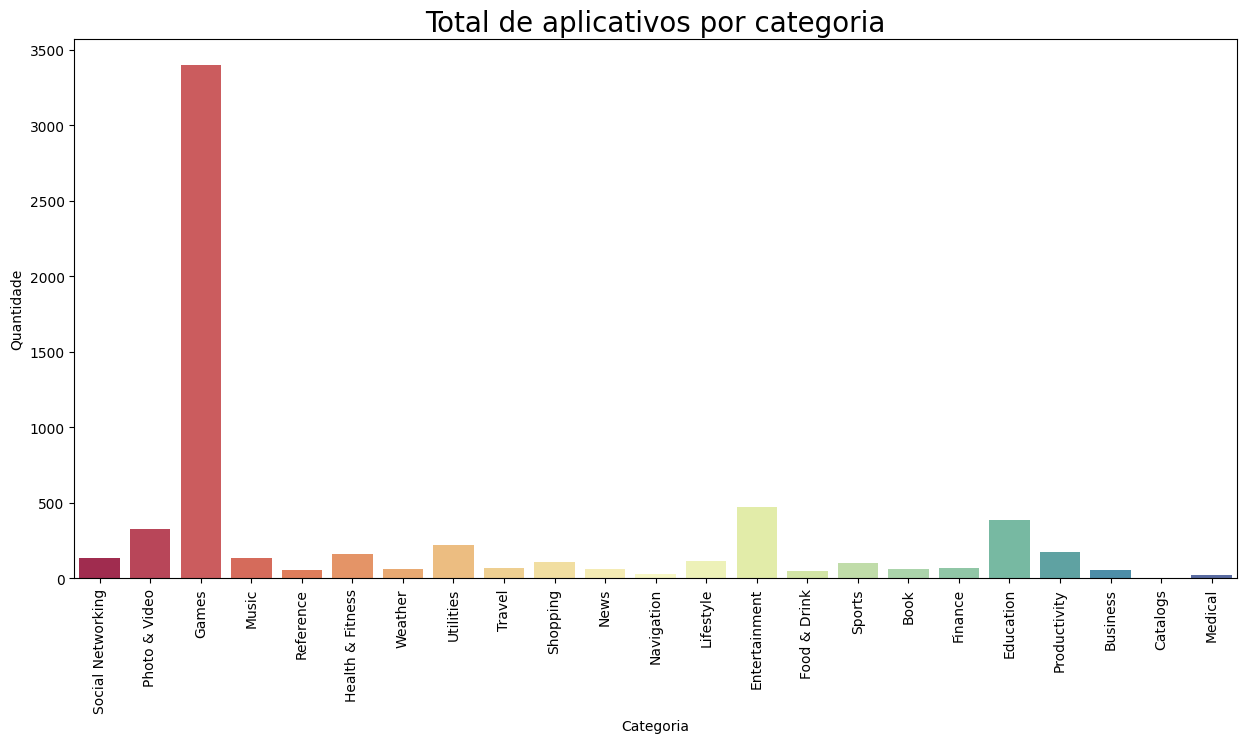

In [13]:
plt.figure(figsize=(15,7))
fig = sns.countplot(x=df_app.prime_genre, palette="Spectral")
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.title('Total de aplicativos por categoria', size=20)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

A grande maioria dos aplicativos pertence a categoria de **Games** seguidos por um pequeno número de aplicativos de Entretenimento, Photo & Video e Educação.

### **Quais são os 15 games free com o maior número de classificações?**

In [14]:
# Games Free:
top_free_games = df_app[(df_app["prime_genre"]=="Games") & (df_app["price"]==0)]
top_free_games.sort_values(by="rating_count_tot", ascending=False)[["track_name", "rating_count_tot", "user_rating","price"]].head(15)

,track_name,rating_count_tot,user_rating,price
2,Clash of Clans,2130805,4.5,0.0
3,Temple Run,1724546,4.5,0.0
7,Candy Crush Saga,961794,4.5,0.0
9,Angry Birds,824451,4.5,0.0
10,Subway Surfers,706110,4.5,0.0
12,Solitaire,679055,4.5,0.0
13,CSR Racing,677247,4.5,0.0
14,Crossy Road - Endless Arcade Hopper,669079,4.5,0.0
15,Injustice: Gods Among Us,612532,4.5,0.0
16,Hay Day,567344,4.5,0.0


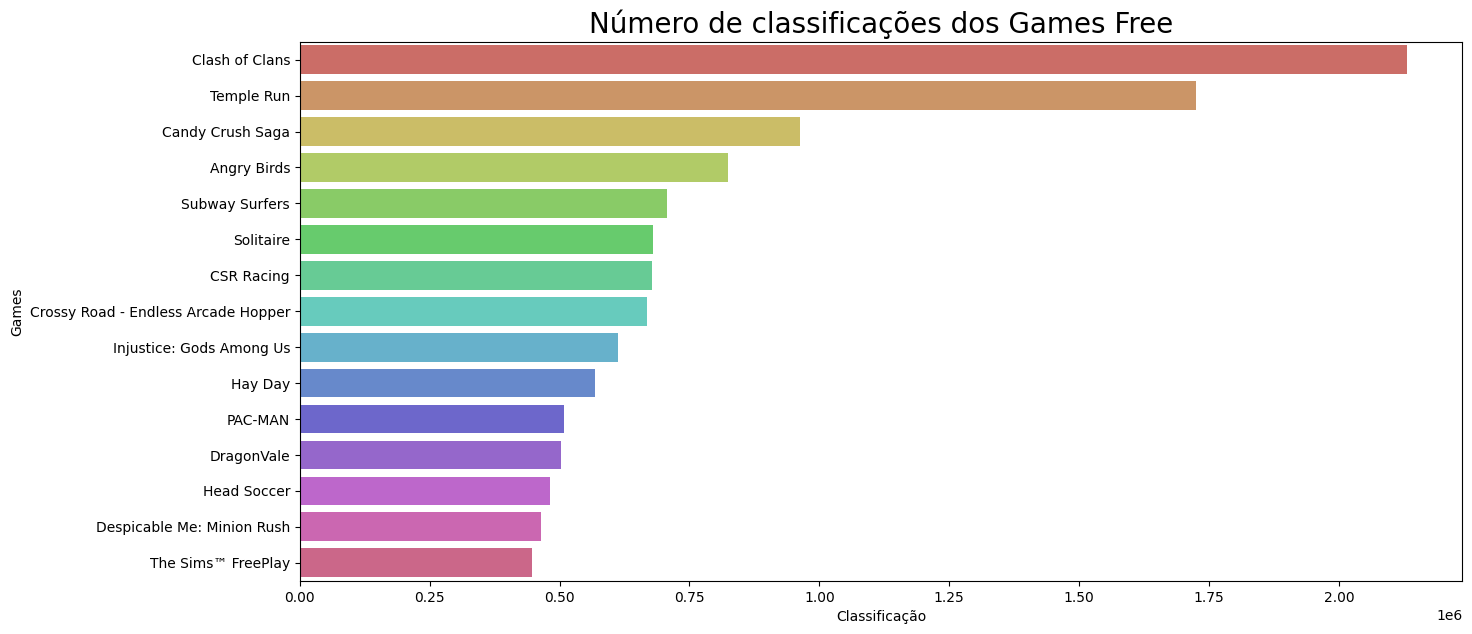

In [15]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x=top_free_games['rating_count_tot'][:15], y=top_free_games['track_name'][:15],palette="hls")
plt.xlabel('Classificação')
plt.ylabel('Games')
plt.title('Número de classificações dos Games Free', size=20)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

Quanto maior o número de classificações maior é o número de usuários desse app.

### **Quais são os 15 games paid com o maior número de classificações?**

In [16]:
# Games Paid:
top_paid_games = df_app[(df_app["prime_genre"]=="Games") & (df_app["price"]!=0)]
top_paid_games.sort_values(by="rating_count_tot", ascending=False)[["track_name", "rating_count_tot", "user_rating","price"]].head(15)

,track_name,rating_count_tot,user_rating,price
11,Fruit Ninja Classic,698516,4.5,1.99
17,Clear Vision (17+),541693,4.5,0.99
18,Minecraft: Pocket Edition,522012,4.5,6.99
28,Plants vs. Zombies,426463,5.0,0.99
37,Doodle Jump,395261,4.5,0.99
45,Draw Something,360974,4.5,2.99
53,Infinity Blade,326482,5.0,0.99
70,Geometry Dash,266440,5.0,1.99
86,Tiny Wings,219418,4.5,0.99
88,Traffic Rush,213092,3.5,0.99


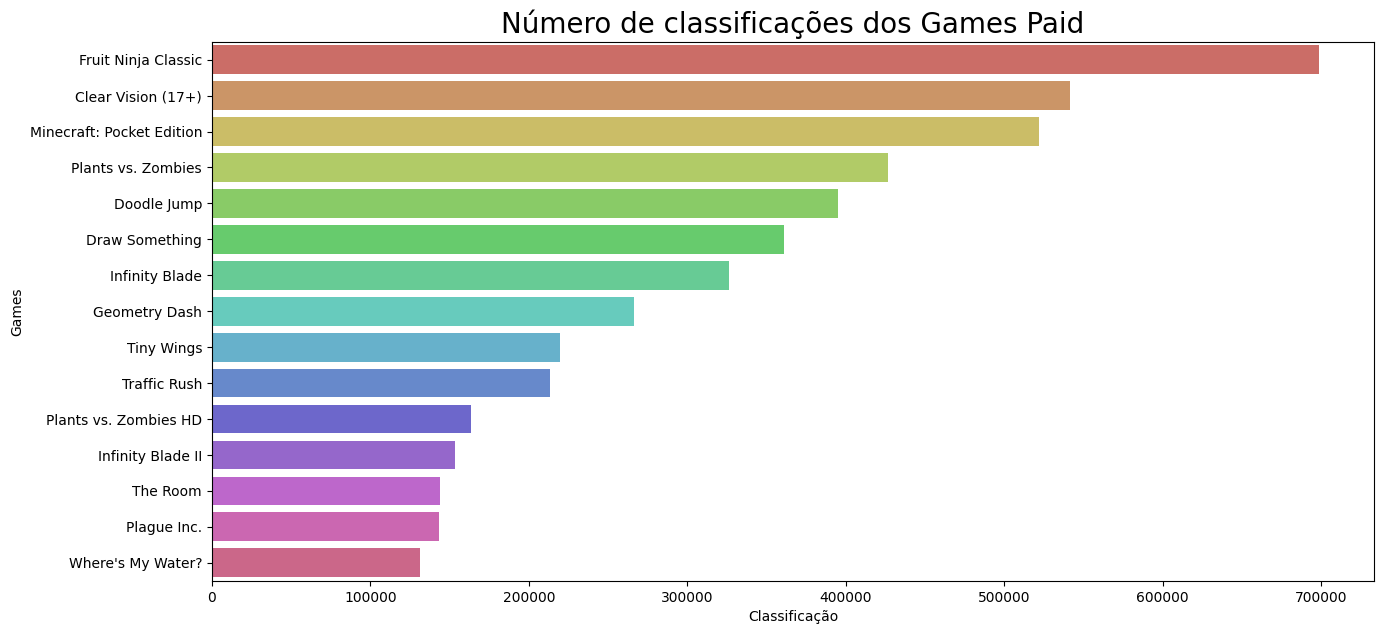

In [17]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x=top_paid_games['rating_count_tot'][:15], y=top_paid_games['track_name'][:15],palette="hls")
plt.xlabel('Classificação')
plt.ylabel('Games')
plt.title('Número de classificações dos Games Paid', size=20)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

### **Quais são os aplicativos que não são jogos e tem uma classificação alta?**

In [18]:
top_not_games = df_app[df_app['prime_genre'] != 'Games']
top_not_games.sort_values(by="rating_count_tot", ascending=False)[["track_name", "rating_count_tot", "user_rating"]].head(15)

,track_name,rating_count_tot,user_rating
0,Facebook,2974676,3.5
1,Instagram,2161558,4.5
4,Pandora - Music & Radio,1126879,4.0
5,Pinterest,1061624,4.5
6,Bible,985920,4.5
8,Spotify Music,878563,4.5
20,Calorie Counter & Diet Tracker by MyFitnessPal,507706,4.5
22,"The Weather Channel: Forecast, Radar & Alerts",495626,3.5
24,Google – Search made just for mobile,479440,3.5
27,Google Earth,446185,3.5


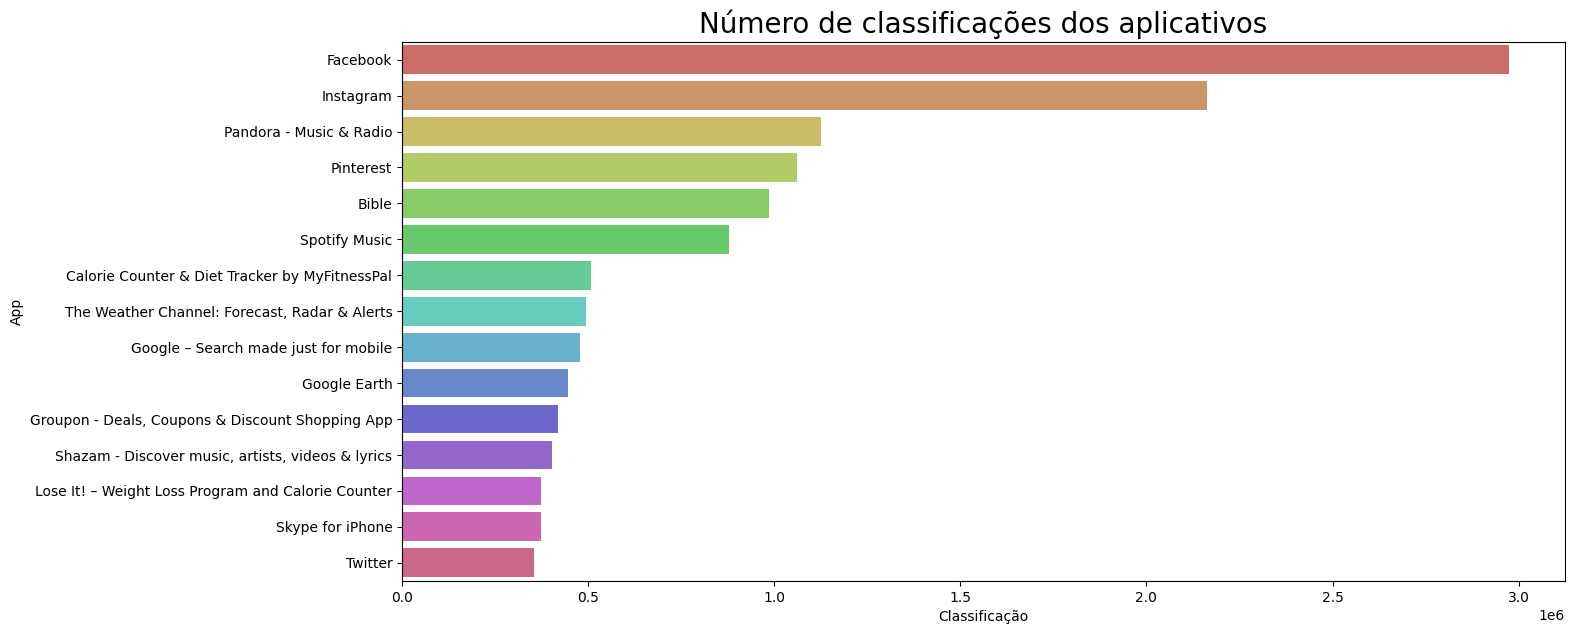

In [19]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x=top_not_games['rating_count_tot'][:15], y=top_not_games['track_name'][:15],palette="hls")
plt.xlabel('Classificação')
plt.ylabel('App')
plt.title('Número de classificações dos aplicativos', size=20)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

### **Os aplicativos são direcionados para quais faixa etárias?**

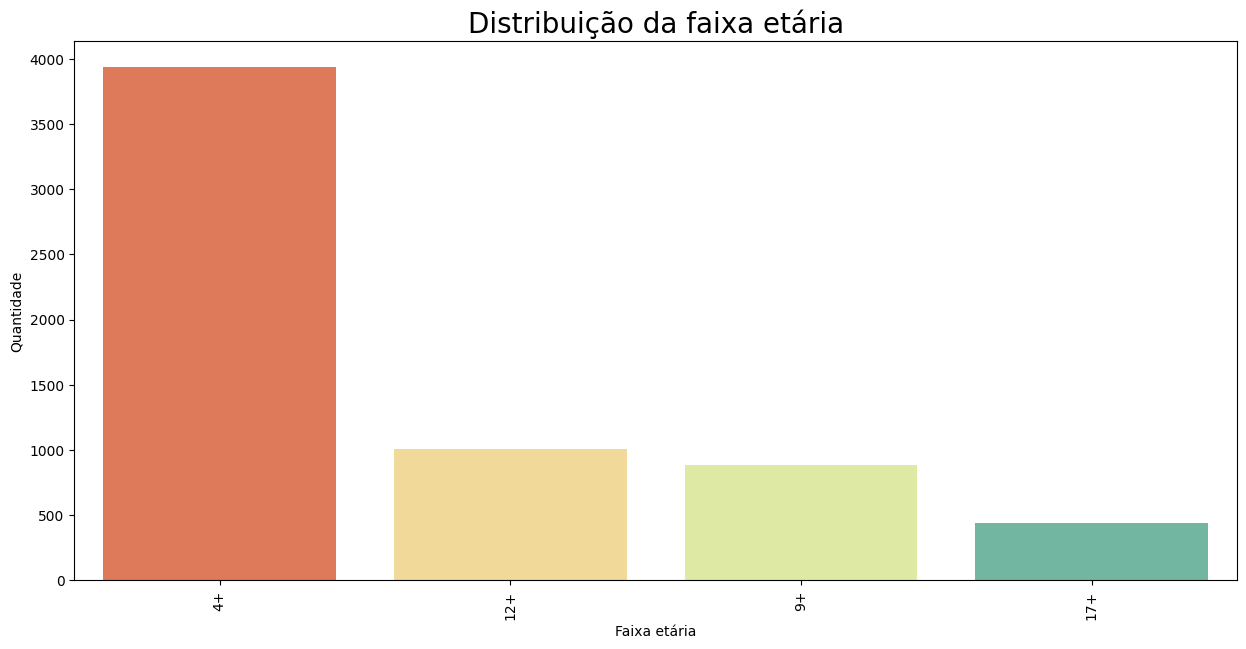

In [20]:
plt.figure(figsize=(15,7))
fig = sns.countplot(x=df_app.cont_rating, palette="Spectral")
plt.xlabel('Faixa etária')
plt.ylabel('Quantidade')
plt.title('Distribuição da faixa etária', size=20)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

A maioria dos aplicativos está disponível para o público maior de 4 anos.

### **Quais são os 15 aplicativos com o maior número classificações?**

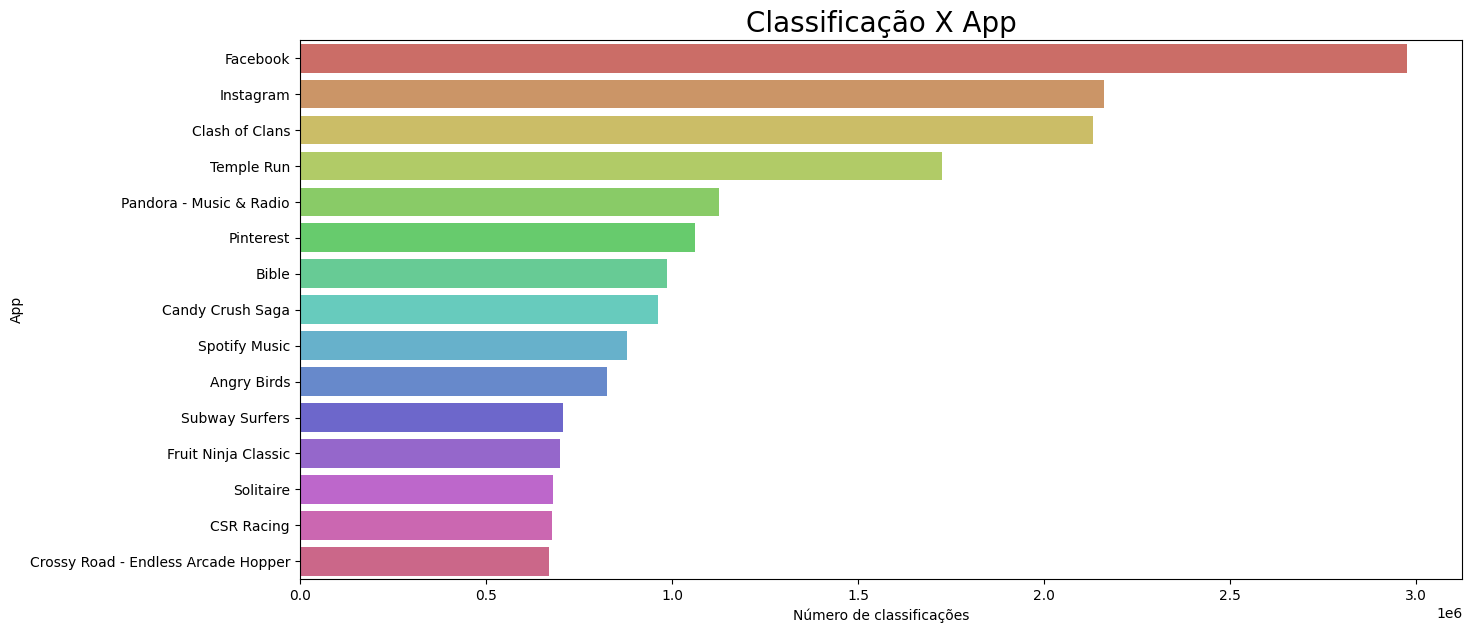

In [21]:
plt.figure(figsize=(15,7))
ax=sns.barplot(y='track_name',x='rating_count_tot',data=df_app.head(15),palette="hls")
plt.xlabel('Número de classificações')
plt.ylabel('App')
plt.title('Classificação X App', size=20)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)


In [22]:
# Os 15 aplicativos com mais avaliações:
df_app.sort_values(by="rating_count_tot", ascending=False)[["track_name", "rating_count_tot", "user_rating"]].head(15)

,track_name,rating_count_tot,user_rating
0,Facebook,2974676,3.5
1,Instagram,2161558,4.5
2,Clash of Clans,2130805,4.5
3,Temple Run,1724546,4.5
4,Pandora - Music & Radio,1126879,4.0
5,Pinterest,1061624,4.5
6,Bible,985920,4.5
7,Candy Crush Saga,961794,4.5
8,Spotify Music,878563,4.5
9,Angry Birds,824451,4.5


### **A loja tem mais aplicativos pagos ou gratuitos?**

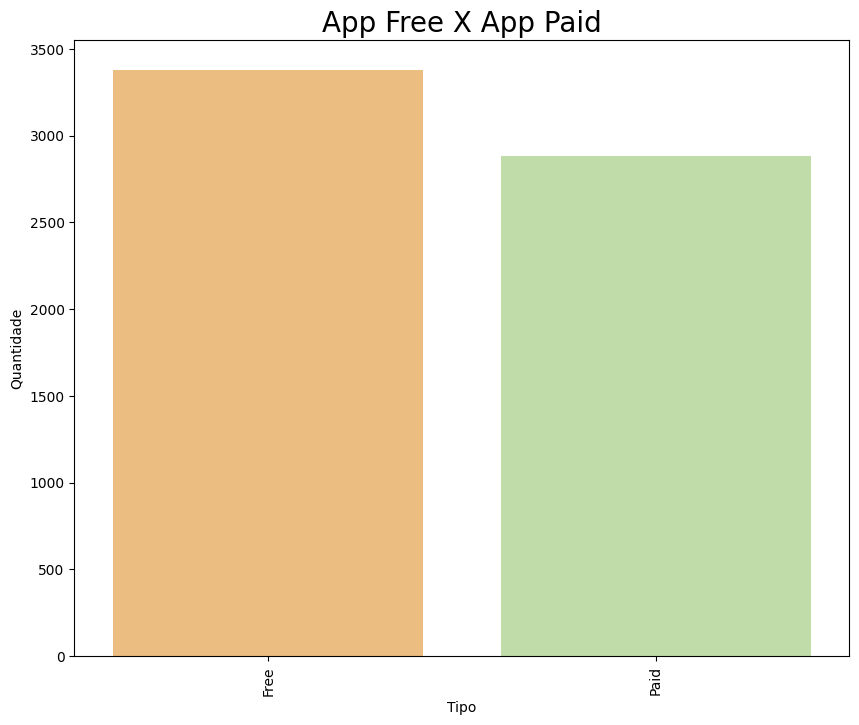

In [23]:
plt.figure(figsize=(10,8))
fig = sns.countplot(x=df_app.price.apply(lambda x: 'Free' if x == 0 else 'Paid'), palette="Spectral")
plt.xlabel('Tipo')
plt.ylabel('Quantidade')
plt.title('App Free X App Paid', size=20)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

O número de aplicativos pagos e gratuitos é quase que o mesmo, existe pouca diferença.

### **Entre os aplicativos pagos quais são os preços mais frequentes?**

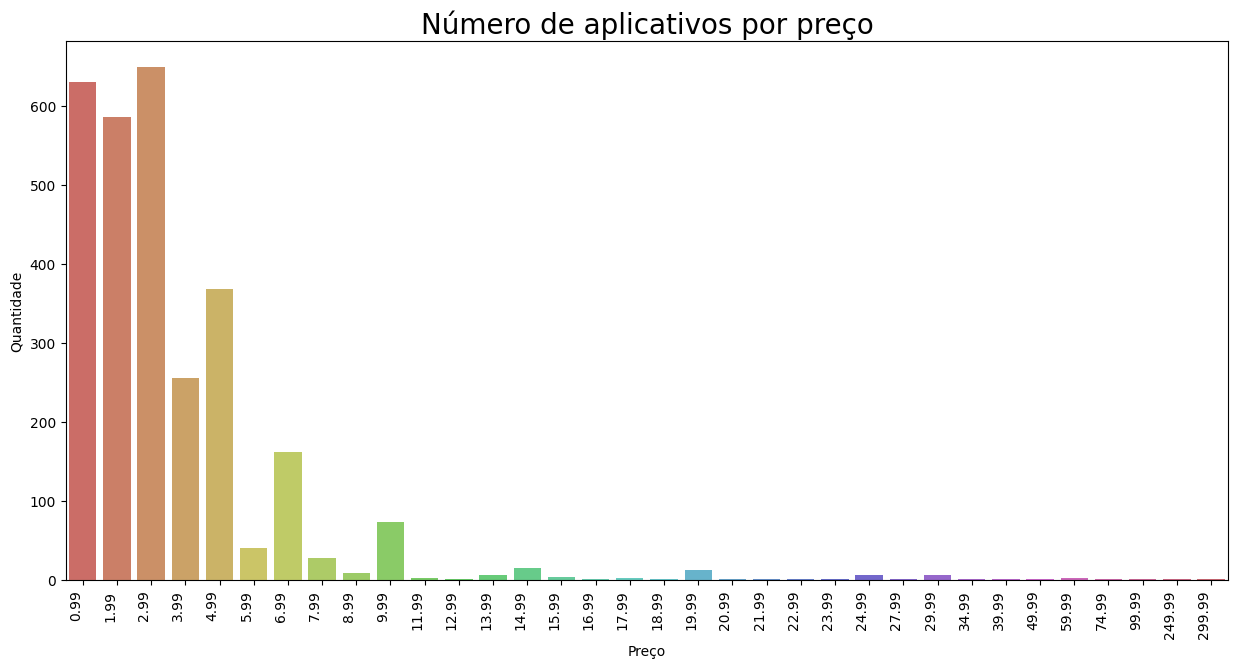

In [24]:
plt.figure(figsize=(15,7))
price_app = df_app[df_app.price != 0.0]
price_plot = sns.countplot(x=price_app["price"], palette = "hls")
plt.xlabel('Preço')
plt.ylabel('Quantidade')
plt.title('Número de aplicativos por preço',size = 20)
price_plot.set_xticklabels(price_plot.get_xticklabels(), rotation=90, ha="right")
plt.show(fig)

Filtramos somente os aplicativos pagos para poder observar a sua distribuição. A distribuição desses valores está na faixa de 0.99 a 4.99 dólares.

### **Quais são as classificações mais frequentes?**

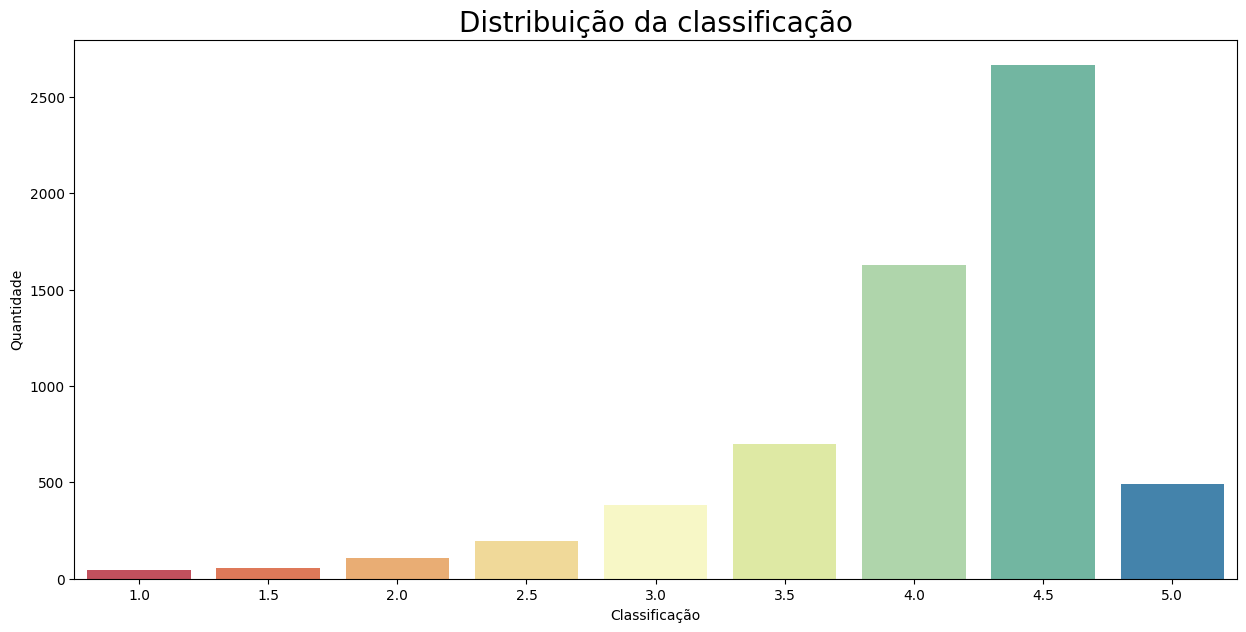

In [25]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x="user_rating",data=df_app, palette = "Spectral")
plt.xlabel('Classificação')
plt.ylabel('Quantidade')
plt.title('Distribuição da classificação',size = 20)
plt.show(fig)

Muitos aplicativos tem uma classificação em torno de 4.0 a 4.5 estrelas e alguns com uma classificação de 5.0 estrelas.

## **Conclusão**

Depois de toda essa análise podemos concluir que os aplicativos voltados para games são os que mais atraem os usuários, então um desenvolvedor pode usar essa análise como base para criar seu próximo aplicativo.

